In [5]:
import pandas as pd

# Load the dataset (update the file path as needed)
dd=pd.read_csv("Data_cleaning_on_online _retailer.csv")


In [11]:
dd.count()
dd.info()
dd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397758 entries, 0 to 397757
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397758 non-null  int64  
 1   StockCode    397758 non-null  object 
 2   Description  397758 non-null  object 
 3   Quantity     397758 non-null  int64  
 4   InvoiceDate  397758 non-null  object 
 5   UnitPrice    397758 non-null  float64
 6   CustomerID   397758 non-null  float64
 7   Country      397758 non-null  object 
 8   TotalSales   397758 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ MB


,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalSales
count,397758.000000,397758.000000,397758.000000,397758.000000,397758.000000
mean,560617.996877,12.172572,2.989840,15294.418026,21.268537
std,13105.778190,31.788318,6.995346,1713.107323,87.349641
min,536365.000000,1.000000,0.001000,12347.000000,0.001000
25%,549234.250000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,1000.000000,908.160000,18287.000000,38970.000000


In [15]:
# Total number of unique transactions
total_transactions = dd["InvoiceNo"].nunique()

# Total sales calculation
dd["TotalSales"] = dd["Quantity"] * dd["UnitPrice"]
total_sales = dd["TotalSales"].sum()

print(f"Total Transactions: {total_transactions}")
print(f"Total Sales: {total_sales:.2f}")


Total Transactions: 18485
Total Sales: 8459730.77


In [49]:
#the overall distribution of sales by month, year, or product?
sale_ctr = dd.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)
print(sale_ctr)


Country
United Kingdom          6902020.704
Netherlands              275523.780
EIRE                     261941.160
Germany                  228867.140
France                   199565.630
Australia                137887.710
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Norway                    36165.440
Portugal                  30955.930
Japan                     29970.370
Finland                   22546.080
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Singapore                  9522.290
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

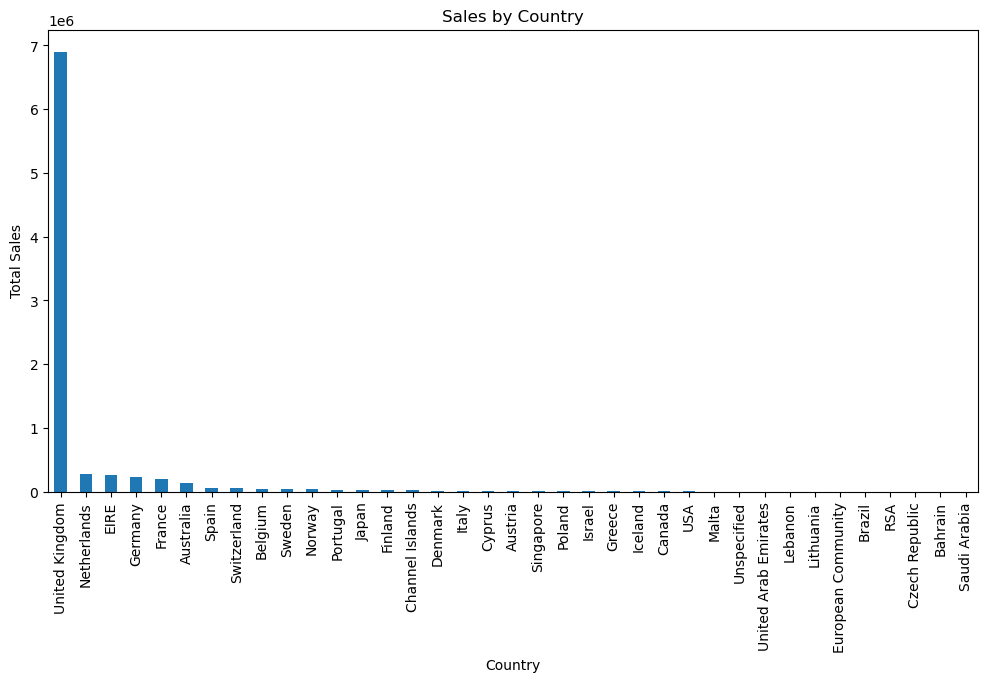

In [19]:
import matplotlib.pyplot as plt

sales_by_country.plot(kind="bar", figsize=(12,6), title="Sales by Country")
plt.ylabel("Total Sales")
plt.show()


In [23]:
#the breakdown of sales by product (StockCode/Description)
sale_prd = dd.groupby(["StockCode", "Description"])["TotalSales"].sum().sort_values(ascending=False)
print(sale_prd)


StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              142592.950
85123A     WHITE HANGING HEART T-LIGHT HOLDER     87622.250
85099B     JUMBO BAG RED RETROSPOT                83240.780
POST       POSTAGE                                69661.210
47566      PARTY BUNTING                          68844.330
                                                    ...    
90104      PURPLE FRANGIPANI HAIRCLIP                 0.850
21268      VINTAGE BLUE TINSEL REEL                   0.840
23366      SET 12 COLOURING PENCILS DOILEY            0.650
84227      HEN HOUSE W CHICK IN NEST                  0.420
PADS       PADS TO MATCH ALL CUSHIONS                 0.003
Name: TotalSales, Length: 3895, dtype: float64


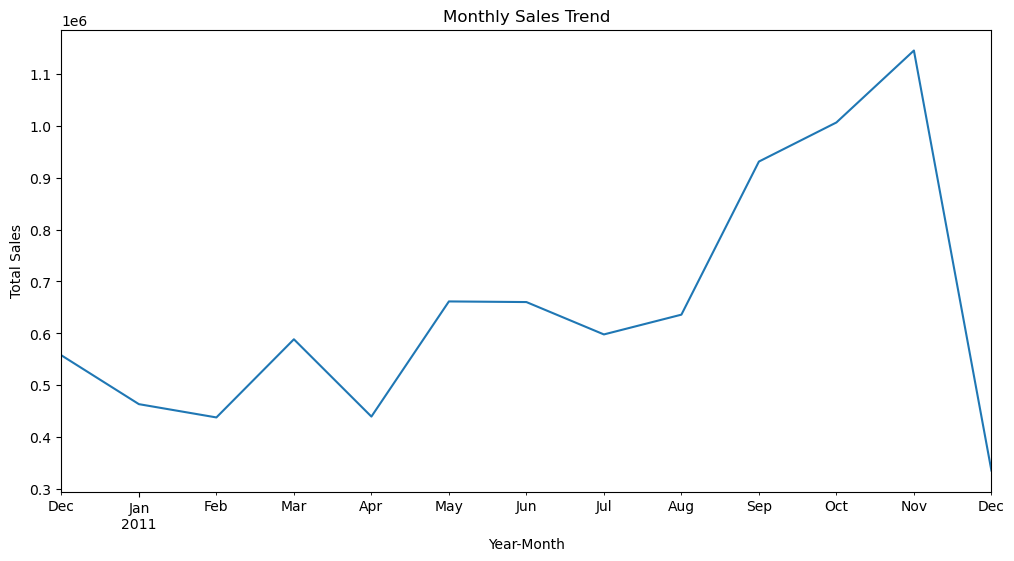

In [33]:
#sales trends vary by month or year
dd["InvoiceDate"] = pd.to_datetime(dd["InvoiceDate"], errors="coerce")  # Convert to datetime
dd["YearMonth"] = dd["InvoiceDate"].dt.to_period("M")  # Extract Year-Month

sales_trend = dd.groupby("YearMonth")["TotalSales"].sum()

# Visualizing the trend
sales_trend.plot(figsize=(12,6), title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Year-Month")
plt.show()


In [41]:
# the average transaction value (e.g., total sales per invoice)
avg_tran = dd.groupby("InvoiceNo")["TotalSales"].sum().mean()
print(f"Average Transaction Value: {avg_tran:.2f}")


Average Transaction Value: 457.65


In [45]:
#ales break down by customer segment (e.g., by Country or CustomerID)
sale_cust = dd.groupby("CustomerID")["TotalSales"].sum().sort_values(ascending=False)
sale_ctr = dd.groupby("Country")["TotalSales"].sum()

print(sale_cust.head(10))  # Top 10 customers
print(sale_ctr)


CustomerID
14646.0    270283.46
18102.0    255000.34
17450.0    168740.07
14911.0    140450.72
12415.0    124280.93
14156.0    117149.23
17511.0     91062.38
16684.0     66653.56
13694.0     64640.74
16029.0     64248.81
Name: TotalSales, dtype: float64
Country
Australia                137887.710
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20450.440
Cyprus                    13590.380
Czech Republic              826.740
Denmark                   18955.340
EIRE                     261941.160
European Community         1300.250
Finland                   22546.080
France                   199565.630
Germany                  228867.140
Greece                     4760.520
Iceland                    4310.000
Israel                     7221.690
Italy                     17483.240
Japan                     29970.370
Lebanon           

In [47]:
#products have the highest and lowest sales
top_prd = sales_by_product.head(10)  # Top 10 best-sellers
bottom_prd = sales_by_product.tail(10)  # Bottom 10 worst-sellers

print("Top-selling products:\n", top_prd)
print("Lowest-selling products:\n", bottom_prd)


Top-selling products:
 StockCode  Description                       
22423      REGENCY CAKESTAND 3 TIER              142592.95
85123A     WHITE HANGING HEART T-LIGHT HOLDER     87622.25
85099B     JUMBO BAG RED RETROSPOT                83240.78
POST       POSTAGE                                69661.21
47566      PARTY BUNTING                          68844.33
84879      ASSORTED COLOUR BIRD ORNAMENT          50664.34
79321      CHILLI LIGHTS                          46286.51
23084      RABBIT NIGHT LIGHT                     40125.00
22086      PAPER CHAIN KIT 50'S CHRISTMAS         40059.83
22502      PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalSales, dtype: float64
Lowest-selling products:
 StockCode  Description                        
84569C     PACK 4 FLOWER/BUTTERFLY PATCHES        1.250
84990      60 GOLD AND SILVER FAIRY CAKE CASES    1.100
84206B     CAT WITH SUNGLASSES BLANK CARD         0.950
84201C     HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
90084      